In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# File paths for training and testing data
train_file_paths = [
    '/content/drive/MyDrive/micro+gas+turbine+electrical+energy+prediction/train/train/ex_1.csv',
    '/content/drive/MyDrive/micro+gas+turbine+electrical+energy+prediction/train/train/ex_20.csv',
    '/content/drive/MyDrive/micro+gas+turbine+electrical+energy+prediction/train/train/ex_21.csv',
    '/content/drive/MyDrive/micro+gas+turbine+electrical+energy+prediction/train/train/ex_23.csv',
    '/content/drive/MyDrive/micro+gas+turbine+electrical+energy+prediction/train/train/ex_24.csv',
    '/content/drive/MyDrive/micro+gas+turbine+electrical+energy+prediction/train/train/ex_9.csv'
]

test_file_paths = [
    '/content/drive/MyDrive/micro+gas+turbine+electrical+energy+prediction/test/test/ex_22.csv',
    '/content/drive/MyDrive/micro+gas+turbine+electrical+energy+prediction/test/test/ex_4.csv'
]


In [ ]:
train_data_list = [pd.read_csv(file) for file in train_file_paths]
test_data_list = [pd.read_csv(file) for file in test_file_paths]

In [ ]:
for df in train_data_list:
  df['elapsed_time'] = df['time'] - df['time'].min()
train_data = pd.concat(train_data_list, ignore_index=True)

In [ ]:
for df in test_data_list:
  df['elapsed_time'] = df['time'] - df['time'].min()
test_data = pd.concat(test_data_list, ignore_index=True)

In [ ]:
# Function to add lag features
def add_lag_features(df, lags, columns):
    for col in columns:
        for lag in lags:
            df[f"{col}_lag_{lag}"] = df[col].shift(lag)
    return df


In [ ]:
# Adding lag features
lags = [1, 2, 3]
columns = ['input_voltage', 'el_power']
train_data = add_lag_features(train_data, lags, columns).dropna()
test_data = add_lag_features(test_data, lags, columns).dropna()

In [ ]:
# Separate features and target including the original time and elapsed time
X_train = train_data[['time', 'elapsed_time', 'input_voltage', 'input_voltage_lag_1', 'input_voltage_lag_2', 'input_voltage_lag_3',
                    'el_power_lag_1', 'el_power_lag_2', 'el_power_lag_3']]
y_train = train_data['el_power']
X_test = test_data[['time', 'elapsed_time', 'input_voltage', 'input_voltage_lag_1', 'input_voltage_lag_2', 'input_voltage_lag_3',
                    'el_power_lag_1', 'el_power_lag_2', 'el_power_lag_3']]
y_test = test_data['el_power']

In [ ]:
X_train

,time,elapsed_time,input_voltage,input_voltage_lag_1,input_voltage_lag_2,input_voltage_lag_3,el_power_lag_1,el_power_lag_2,el_power_lag_3
3,813.06758,2.9973,10.00,10.00,10.00,10.00,1244.960866,1223.041745,1228.791720
4,814.06668,3.9964,10.00,10.00,10.00,10.00,1229.259058,1244.960866,1223.041745
5,815.06578,4.9955,10.00,10.00,10.00,10.00,1248.117024,1229.259058,1244.960866
6,816.06488,5.9946,10.00,10.00,10.00,10.00,1262.974403,1248.117024,1229.259058
7,817.06398,6.9937,10.00,10.00,10.00,10.00,1248.077560,1262.974403,1248.117024
...,...,...,...,...,...,...,...,...,...
52935,12632.84000,11814.0000,7.24,7.24,7.24,7.24,2469.081387,2347.922221,2460.652226
52936,12633.84000,11815.0000,7.24,7.24,7.24,7.24,2358.536920,2469.081387,2347.922221
52937,12634.84000,11816.0000,7.24,7.24,7.24,7.24,2481.489028,2358.536920,2469.081387
52938,12635.84000,11817.0000,7.24,7.24,7.24,7.24,2327.054441,2481.489028,2358.536920


In [ ]:
X_test

,time,elapsed_time,input_voltage,input_voltage_lag_1,input_voltage_lag_2,input_voltage_lag_3,el_power_lag_1,el_power_lag_2,el_power_lag_3
3,883.300000,3.000000,3.0,3.0,3.0,3.0,1180.406767,1107.066421,1193.140713
4,884.300000,4.000000,3.0,3.0,3.0,3.0,1095.551498,1180.406767,1107.066421
5,885.300000,5.000000,3.0,3.0,3.0,3.0,1177.073719,1095.551498,1180.406767
6,886.300000,6.000000,3.0,3.0,3.0,3.0,1102.007801,1177.073719,1095.551498
7,887.300000,7.000000,3.0,3.0,3.0,3.0,1173.835928,1102.007801,1177.073719
...,...,...,...,...,...,...,...,...,...
18280,10541.535214,9783.109401,3.0,3.0,3.0,3.0,2450.449180,2378.375769,2453.739881
18281,10542.534511,9784.108697,3.0,3.0,3.0,3.0,2373.250274,2450.449180,2378.375769
18282,10543.533807,9785.107993,3.0,3.0,3.0,3.0,2429.362888,2373.250274,2450.449180
18283,10544.533103,9786.107290,3.0,3.0,3.0,3.0,2369.397892,2429.362888,2373.250274


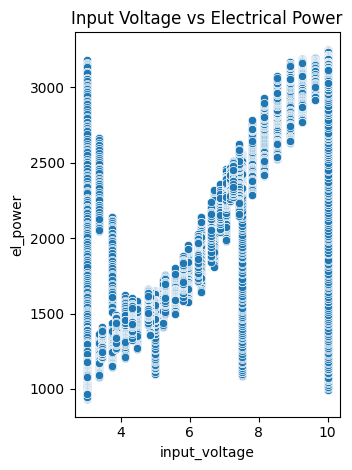

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.subplot(1, 2, 2)
sns.scatterplot(x=train_data['input_voltage'], y=train_data['el_power'])
plt.title('Input Voltage vs Electrical Power')

plt.tight_layout()
plt.show()


MODELS

In [ ]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


# Evaluate the models using RMSE
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

# Display the performance of both models
print("Linear Regression Model")
print("Root Mean Squared Error (RMSE):", rmse_lr)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Mean Absolute Error (MAE):", mae_lr)
print("R² Score:", r2_lr)



Linear Regression Model
Root Mean Squared Error (RMSE): 10.477325857999787
Mean Absolute Error (MAE): 7.800093980750474
R² Score: 0.9998321384608069


In [ ]:
# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the models using RMSE
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)



In [ ]:

# Display the performance of both models
print("\nRandom Forest Regressor Model")
print("Root Mean Squared Error (RMSE):", rmse_rf)


mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean Absolute Error (MAE):", mae_rf)
print("R² Score:", r2_rf)



Random Forest Regressor Model
Root Mean Squared Error (RMSE): 29.266308000343386
Mean Absolute Error (MAE): 15.18180190705098
R² Score: 0.998690256727938


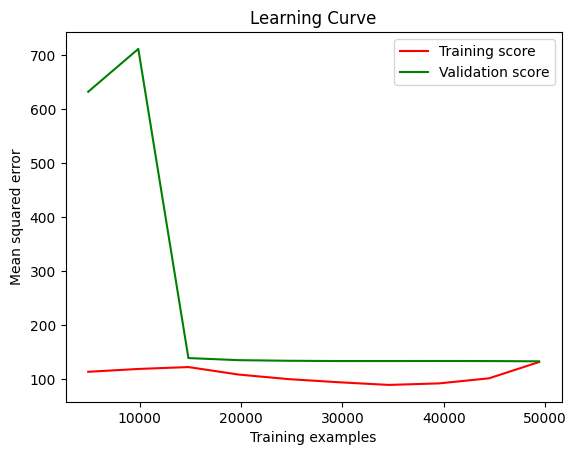

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, val_scores = learning_curve(
    lr, X_train, y_train, cv=15, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, color='r', label='Training score')
plt.plot(train_sizes, val_scores_mean, color='g', label='Validation score')
plt.xlabel('Training examples')
plt.ylabel('Mean squared error')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation for Linear Regression
lin_reg_cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_rmse_lr = np.sqrt(-lin_reg_cv_scores.mean())
print("Cross-Validated RMSE for Linear Regression:", mean_cv_rmse_lr)

# Cross-validation for Random Forest Regressor
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_rmse_rf = np.sqrt(-rf_cv_scores.mean())
print("Cross-Validated RMSE for Random Forest Regressor:", mean_cv_rmse_rf)


Cross-Validated RMSE for Linear Regression: 11.633449578912181
Cross-Validated RMSE for Random Forest Regressor: 24.565502358632894
